In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#  import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Career Preparation/Project Portfolio/Project-5 | dibimbing.id/diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [12]:
# check for descriptive statistics
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
# check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
# check for null values
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [17]:
# check duplicate values
print(df.duplicated().sum())
# remove duplicate values
df = df.drop_duplicates()
print("After Removed Duplicate:")
print(df.duplicated().sum())

3854
After Removed Duplicate:
0


In [18]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [19]:
gender_counts = df['gender'].value_counts()
gender_ratios = gender_counts / gender_counts.sum()
print("Gender Ratios:")
print(gender_ratios)

ratio_str = ':'.join(map(str, gender_counts.values))
print(f"\nRatio representation: {':'.join(gender_counts.index)} = {ratio_str}")

Gender Ratios:
gender
Female    0.584122
Male      0.415691
Other     0.000187
Name: count, dtype: float64

Ratio representation: Female:Male:Other = 56161:39967:18


In [20]:
# Remove Unneccessary value [0.0187%]
df = df[df['gender'] != 'Other']

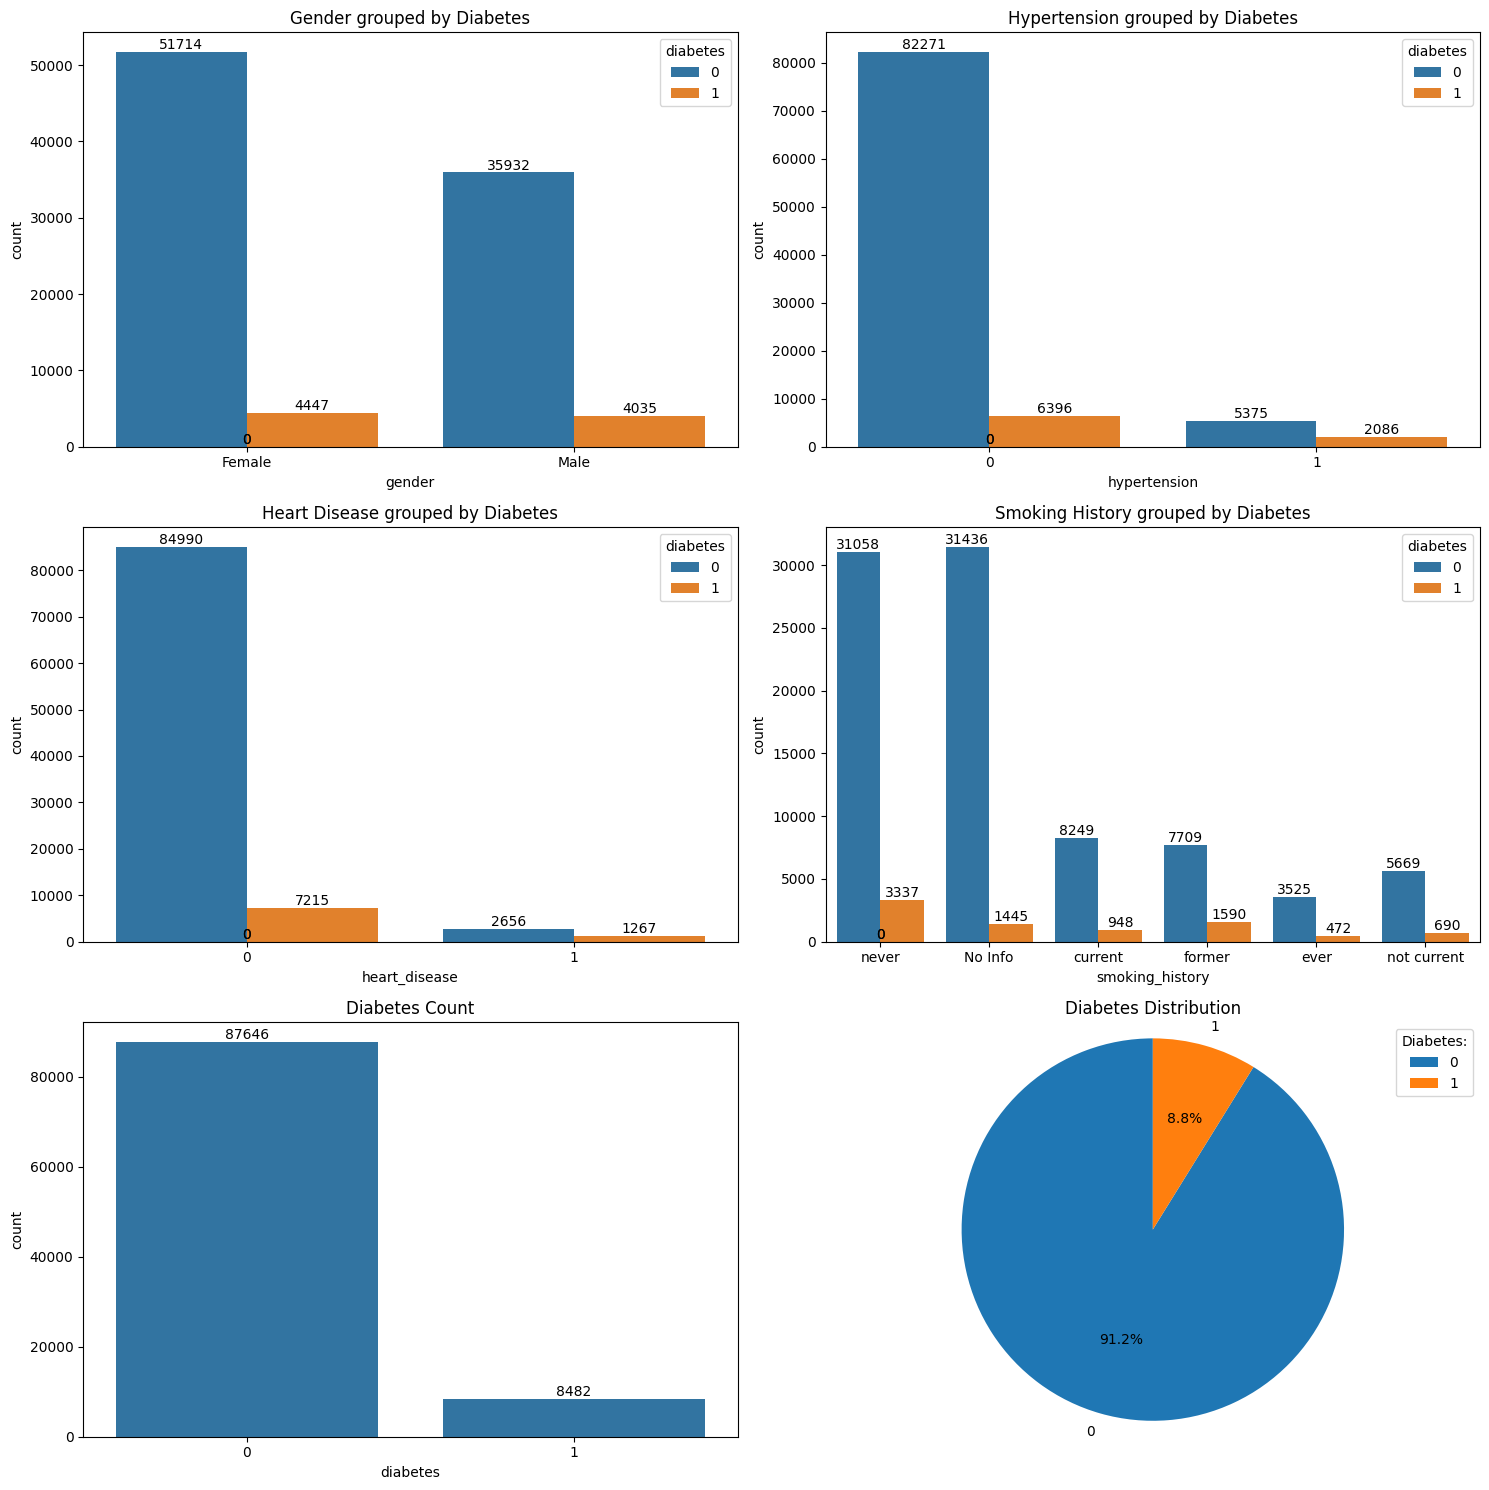

In [21]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=df)
axes[2, 0].set_title('Diabetes Count')
add_counts(ax)

# Create pie plot for diabetes
diabetes_counts = df['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

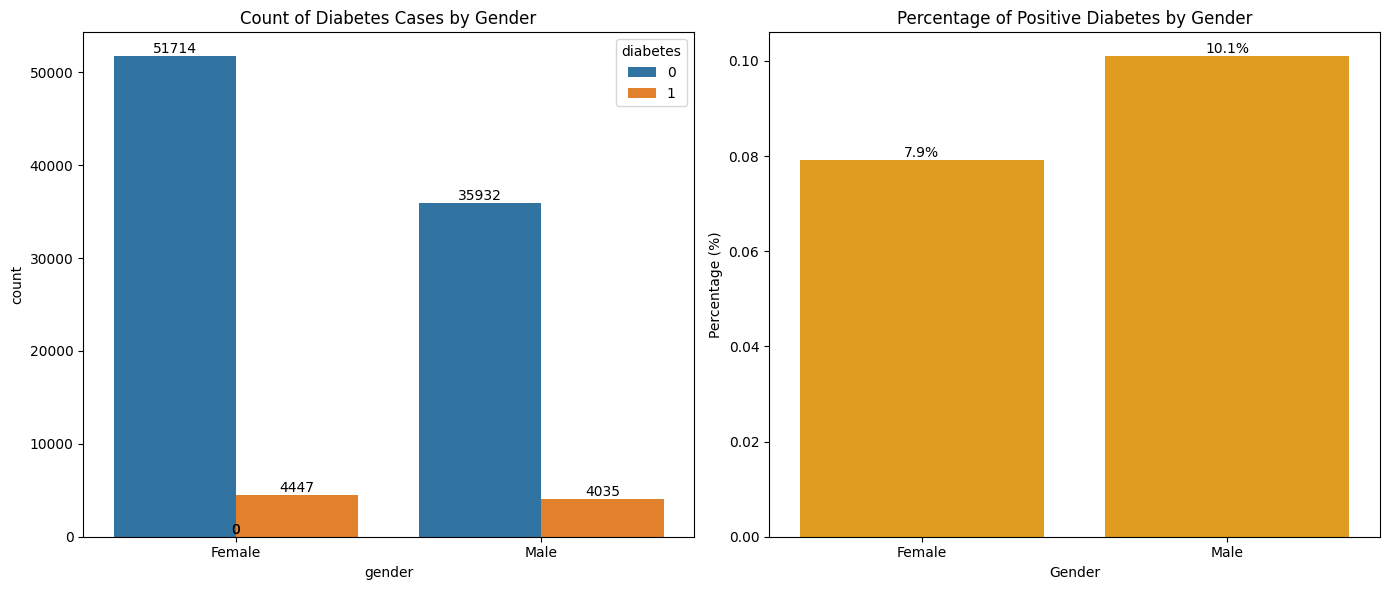

In [22]:
# 1. Chart 1: Count plot jumlah kasus diabetes berdasarkan gender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 baris, 2 kolom

def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Count plot
ax1 = sns.countplot(ax=axes[0], x='gender', hue='diabetes', data=df)
axes[0].set_title('Count of Diabetes Cases by Gender')
add_counts(ax1)

# 2. Chart 2: Persentase hanya untuk positif diabetes
gender_diabetes_positive_percent = (
    df[df['diabetes'] == 1]  # Filter hanya untuk positif diabetes
    .groupby('gender')
    .size()
    .div(df.groupby('gender').size())  # Hitung persentase per gender
    .reset_index(name='percentage')  # Simpan hasil sebagai kolom baru
)

# Bar plot persentase positif diabetes
ax2 = sns.barplot(ax=axes[1], x='gender', y='percentage', data=gender_diabetes_positive_percent, color='orange')
axes[1].set_title('Percentage of Positive Diabetes by Gender')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Gender')

# Tambahkan nilai persentase di atas bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height() * 100:.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Mengatur layout dan menampilkan plot
plt.tight_layout()
plt.show()


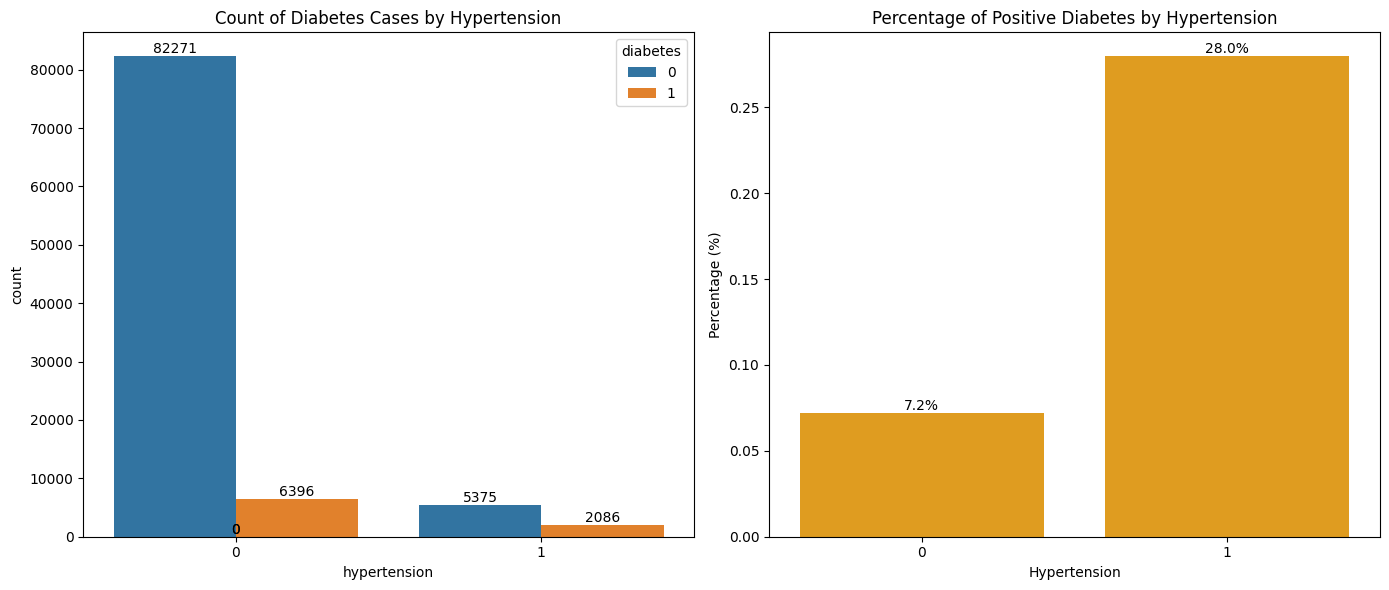

In [23]:
# 1. Chart 1: Count plot jumlah kasus diabetes berdasarkan hipertensi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 baris, 2 kolom

# Count plot
ax1 = sns.countplot(ax=axes[0], x='hypertension', hue='diabetes', data=df)
axes[0].set_title('Count of Diabetes Cases by Hypertension')
add_counts(ax1)

# 2. Chart 2: Persentase hanya untuk positif diabetes berdasarkan hipertensi
hypertension_diabetes_positive_percent = (
    df[df['diabetes'] == 1]  # Filter hanya untuk positif diabetes
    .groupby('hypertension')
    .size()
    .div(df.groupby('hypertension').size())  # Hitung persentase per status hipertensi
    .reset_index(name='percentage')  # Simpan hasil sebagai kolom baru
)

# Bar plot persentase positif diabetes
ax2 = sns.barplot(ax=axes[1], x='hypertension', y='percentage', data=hypertension_diabetes_positive_percent, color='orange')
axes[1].set_title('Percentage of Positive Diabetes by Hypertension')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Hypertension')

# Tambahkan nilai persentase di atas bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height() * 100:.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Mengatur layout dan menampilkan plot
plt.tight_layout()
plt.show()

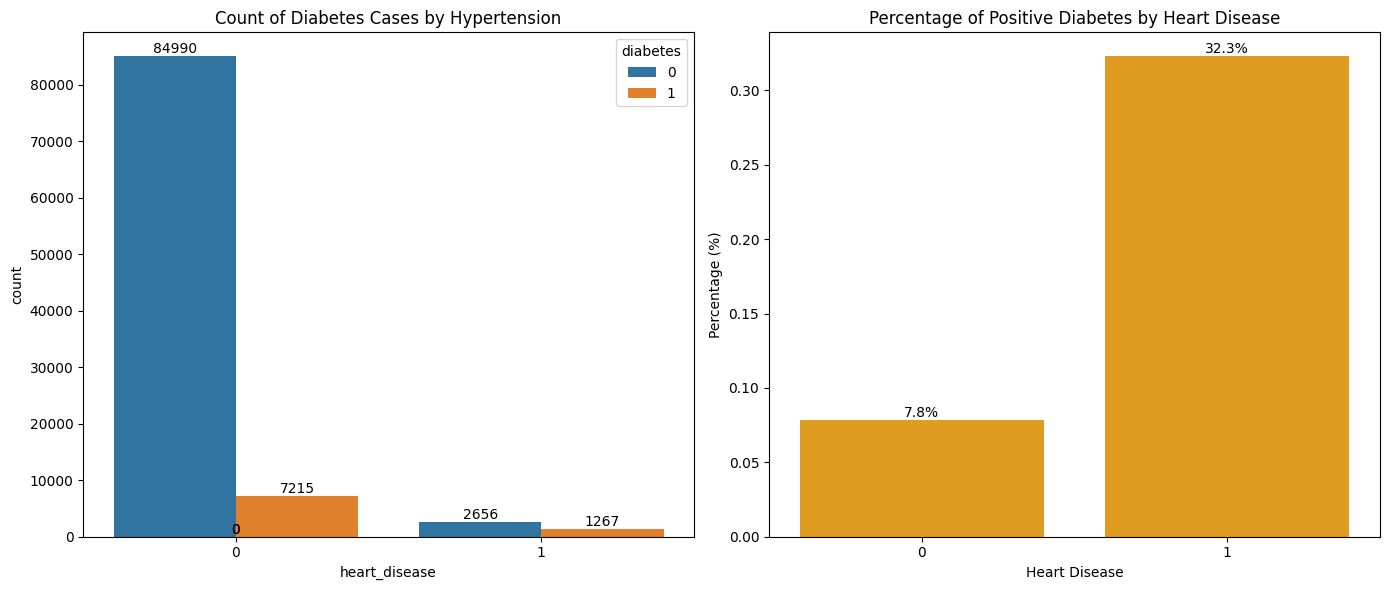

In [24]:
# 1. Chart 1: Count plot jumlah kasus diabetes berdasarkan hipertensi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 baris, 2 kolom

# Count plot
ax1 = sns.countplot(ax=axes[0], x='heart_disease', hue='diabetes', data=df)
axes[0].set_title('Count of Diabetes Cases by Hypertension')
add_counts(ax1)

# 2. Chart 2: Persentase hanya untuk positif diabetes berdasarkan hipertensi
hypertension_diabetes_positive_percent = (
    df[df['diabetes'] == 1]  # Filter hanya untuk positif diabetes
    .groupby('heart_disease')
    .size()
    .div(df.groupby('heart_disease').size())  # Hitung persentase per status hipertensi
    .reset_index(name='percentage')  # Simpan hasil sebagai kolom baru
)

# Bar plot persentase positif diabetes
ax2 = sns.barplot(ax=axes[1], x='heart_disease', y='percentage', data=hypertension_diabetes_positive_percent, color='orange')
axes[1].set_title('Percentage of Positive Diabetes by Heart Disease')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Heart Disease')

# Tambahkan nilai persentase di atas bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height() * 100:.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Mengatur layout dan menampilkan plot
plt.tight_layout()
plt.show()

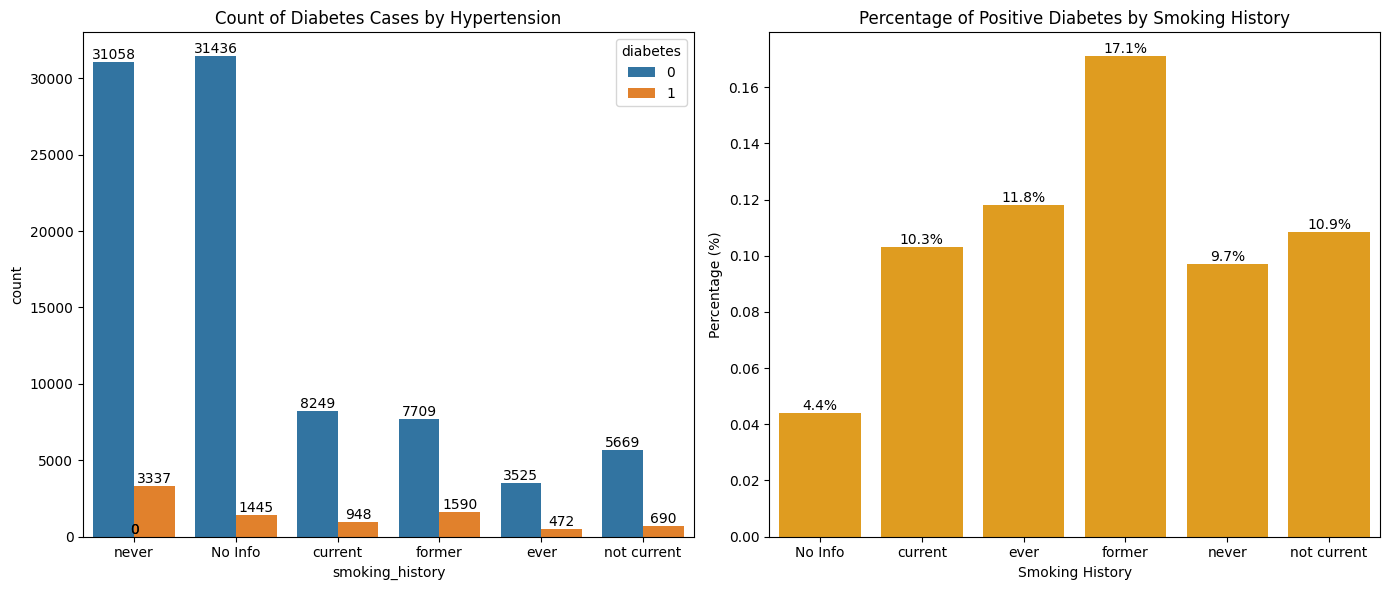

In [25]:
# 1. Chart 1: Count plot jumlah kasus diabetes berdasarkan hipertensi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 baris, 2 kolom

# Count plot
ax1 = sns.countplot(ax=axes[0], x='smoking_history', hue='diabetes', data=df)
axes[0].set_title('Count of Diabetes Cases by Hypertension')
add_counts(ax1)

# 2. Chart 2: Persentase hanya untuk positif diabetes berdasarkan hipertensi
hypertension_diabetes_positive_percent = (
    df[df['diabetes'] == 1]  # Filter hanya untuk positif diabetes
    .groupby('smoking_history')
    .size()
    .div(df.groupby('smoking_history').size())  # Hitung persentase per status hipertensi
    .reset_index(name='percentage')  # Simpan hasil sebagai kolom baru
)

# Bar plot persentase positif diabetes
ax2 = sns.barplot(ax=axes[1], x='smoking_history', y='percentage', data=hypertension_diabetes_positive_percent, color='orange')
axes[1].set_title('Percentage of Positive Diabetes by Smoking History')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Smoking History')

# Tambahkan nilai persentase di atas bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height() * 100:.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Mengatur layout dan menampilkan plot
plt.tight_layout()
plt.show()

In [26]:
data = df.copy()

In [28]:
# incode the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])

In [29]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


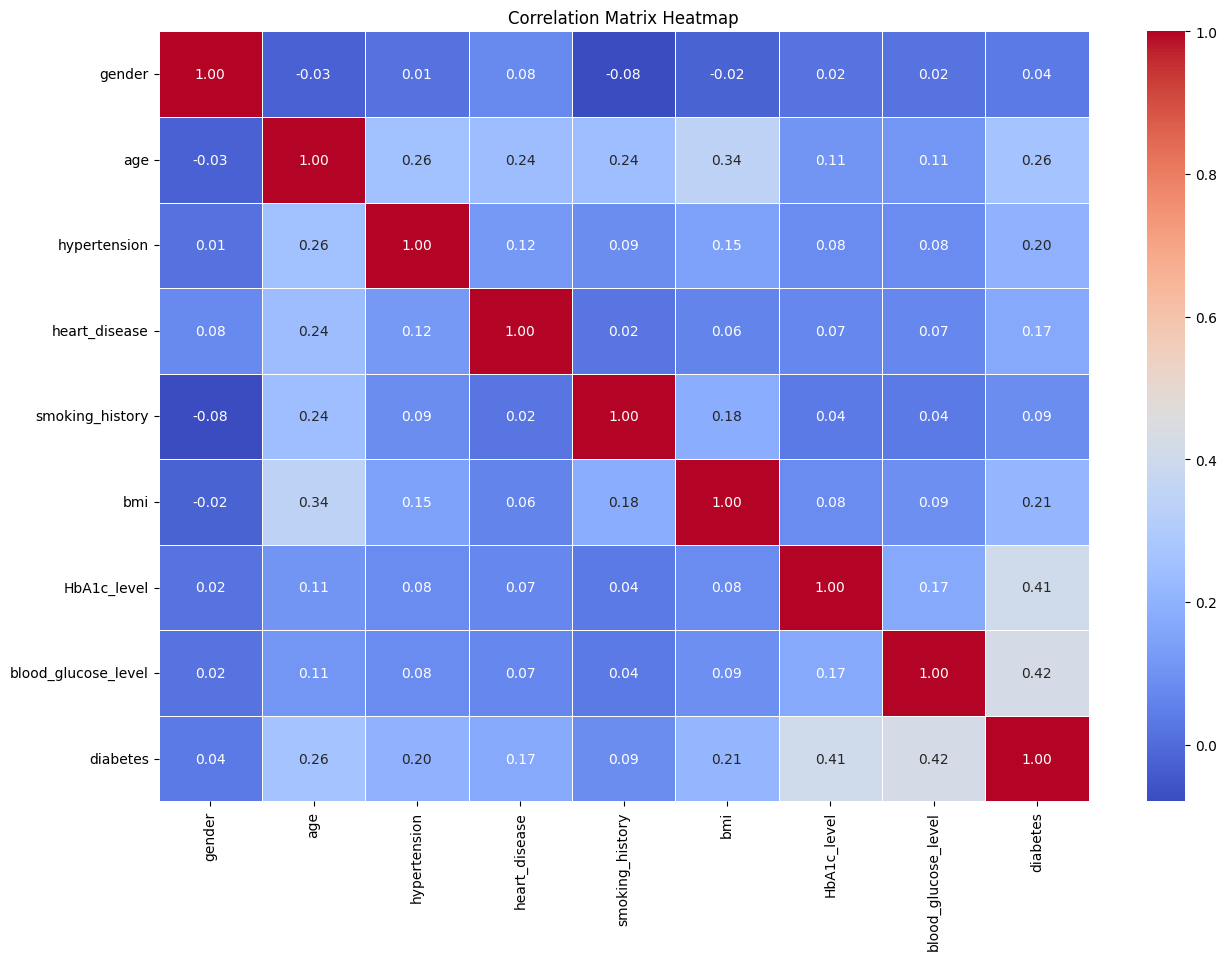

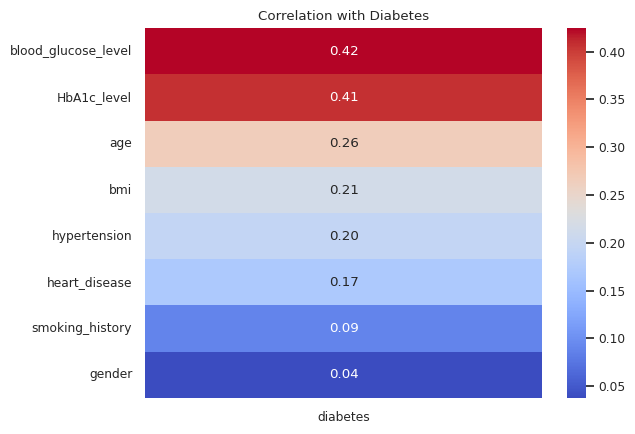

In [30]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

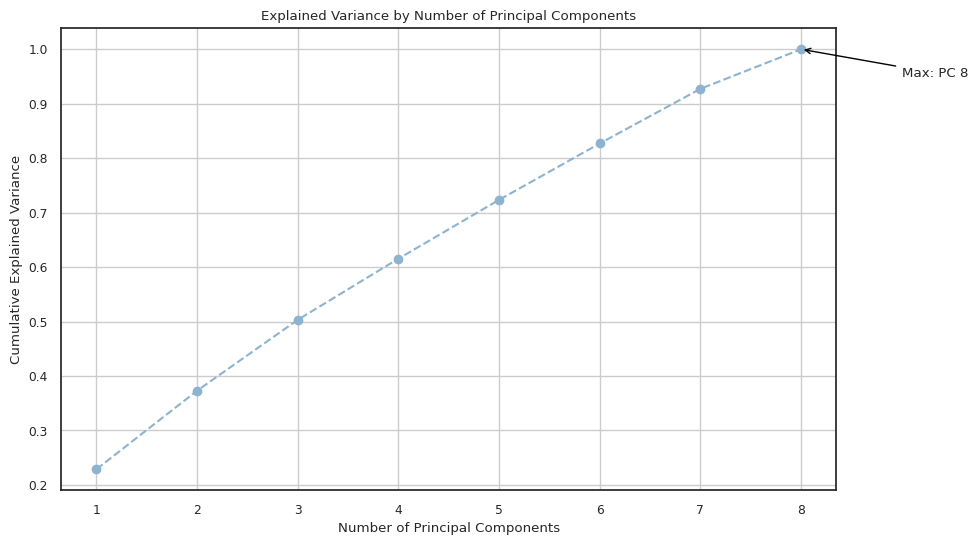

Principal Component 1: 0.2287 cumulative explained variance
Principal Component 2: 0.3730 cumulative explained variance
Principal Component 3: 0.5032 cumulative explained variance
Principal Component 4: 0.6154 cumulative explained variance
Principal Component 5: 0.7234 cumulative explained variance
Principal Component 6: 0.8270 cumulative explained variance
Principal Component 7: 0.9273 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [32]:
# Assume df is your dataframe

# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = data[features]
y = data['diabetes']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca.explained_variance_ratio_.cumsum().argmax()

# Annotate the point with the highest cumulative explained variance
plt.annotate(f'Max: PC {max_index + 1}',
             xy=(max_index + 1, pca.explained_variance_ratio_.cumsum()[max_index]),
             xytext=(max_index + 2, pca.explained_variance_ratio_.cumsum()[max_index] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'))

plt.show()

# Printing explained variance ratios
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Choose the number of components that explain most of the variance
n_components = max_index + 1

# Applying PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [33]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initializing and training the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')

XGBoost Accuracy: 0.9655
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17525
           1       0.93      0.66      0.77      1701

    accuracy                           0.97     19226
   macro avg       0.95      0.83      0.88     19226
weighted avg       0.96      0.97      0.96     19226



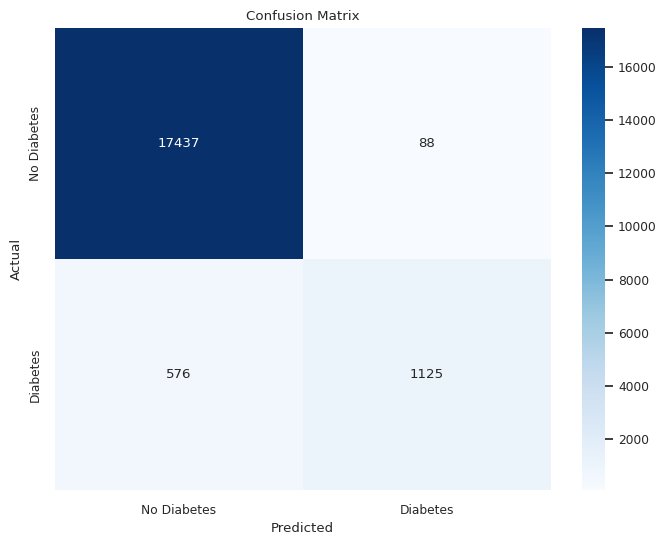

In [34]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.962238635181525
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17525
           1       0.90      0.64      0.75      1701

    accuracy                           0.96     19226
   macro avg       0.93      0.82      0.87     19226
weighted avg       0.96      0.96      0.96     19226



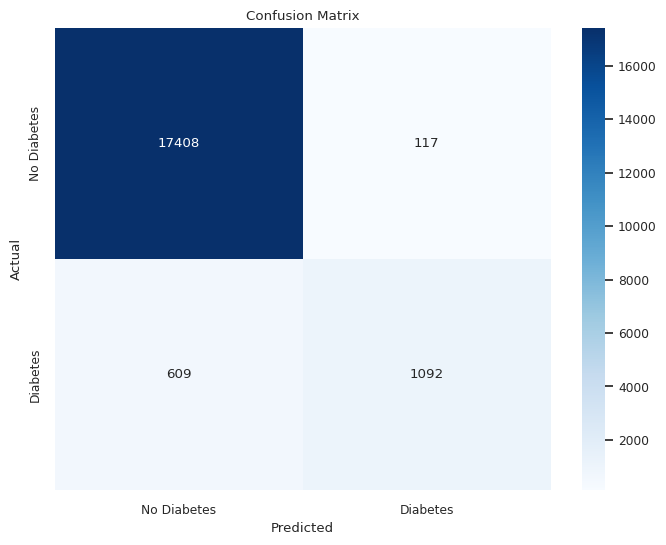

In [36]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

KNN Accuracy: 0.9585977322375949
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.88      0.62      0.73      1701

    accuracy                           0.96     19226
   macro avg       0.92      0.80      0.85     19226
weighted avg       0.96      0.96      0.96     19226



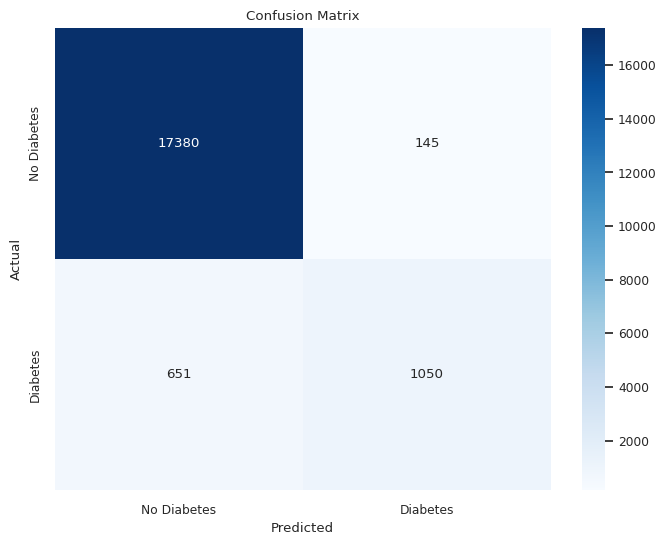

In [38]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, knn_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()